Econ ProbSet 2

John Stachurski

Kendra Robbins 

# HW1

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as ln

Exercise 1

In [10]:
X = np.loadtxt("matrix_data.txt")
N = X.shape[0]

In [11]:
eigvals = ln.eigvals(X)
spectral_radius = max(abs(eigvals))
print("spectral radius:", round(spectral_radius, 6))

spectral radius: 1.004428


In [12]:
v = np.exp(np.random.randn(N))
max_iter = 1000
iter_spectral_radius = np.zeros(max_iter)
for i in range(1, max_iter + 1):
    X_pwr = np.linalg.matrix_power(X, i)
    X_mult = np.matmul(X_pwr, v)
    iter_spectral_radius[i-1] = ln.norm(X_mult)**(1/i)

<Figure size 432x288 with 0 Axes>

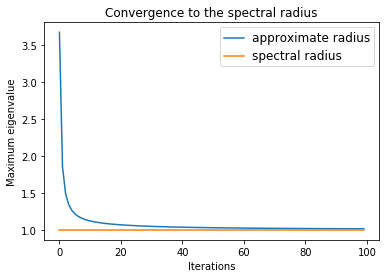

In [30]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(iter_spectral_radius[:], label = 'approximate radius')
ax.plot([spectral_radius] * max_iter, label = 'spectral radius')
legend = ax.legend(loc='upper right', shadow=False)
for label in legend.get_texts():
    label.set_fontsize('large')
plt.xlabel('Iterations')
plt.ylabel('Maximum eigenvalue')
plt.title('Convergence to the spectral radius')
plt.show()

 Exercise 2

In [3]:
from numba import njit

In [4]:
@njit
def quadratic():
    n = 100000                
    x = np.zeros(n)            
    x[0] = np.random.uniform(0, 1)  
    for t in range(n - 1):
        x[t + 1] = 4 * x[t] * (1 - x[t])
    return x

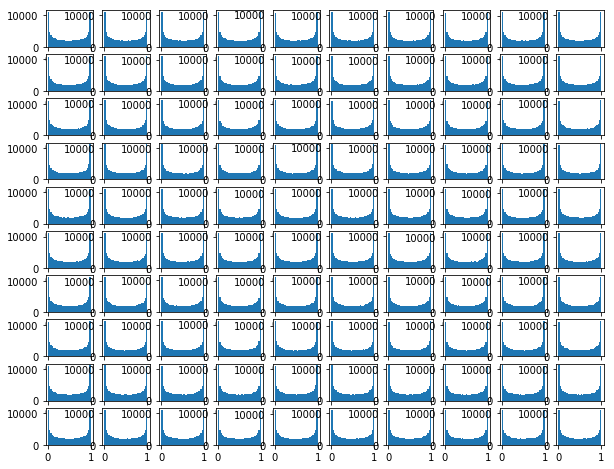

In [115]:
plt.figure(figsize=(10, 8))

for i in range(100):
    k = i+1
    x = quadratic()
    plt.subplot(10,10,k)
    plt.hist(x, bins='auto')
   
plt.show()

All of the histograms look similar.

Exercise 3



Suppose $( \mathbb{X}, g)$ is a dynamical system, $g$ is continuous at $\hat x \in \mathbb{X}$, and $\exists x \in \mathbb{X} $ such that $g^t(x) \rightarrow \hat x$.


$lim_{t\rightarrow \infty} g^t(x) = \hat x \Rightarrow lim_{t\rightarrow \infty} g^{t-1}(x) = \hat x$. 

Since $lim_{t\rightarrow \infty} g^t(x) = \hat x$ and $g$ continuous at $\hat x$: 

$$lim_{t\rightarrow \infty} g^t(x) = g(lim_{t\rightarrow \infty} g^{t-1}(x))$$

Further: 
$$ \hat x = lim_{t\rightarrow \infty} g^t(x) = g(lim_{t\rightarrow \infty} g^{t-1}(x)) = g(\hat x)$$


So we have $g(\hat x) = \hat x$, so $\hat x$ is a steady state.



## HW2

In [16]:
from scipy.stats import norm, beta

In [34]:
from scipy.stats import norm, beta
import matplotlib.pyplot as plt
from ipywidgets import interact

Exercise 1

In [20]:
class KDE:
    
    def __init__(self, X, h=None): #X is data, h is bandwidth
        
        X = np.array(X)
        self.X = X
        self.h = h
        σ_hat = X.std()
        self.n = len(X)
        
        if h is None:
            #Silverman's rule
            self.h = ((4 * σ_hat**5) / (3 * self.n))**(1/5)
            
    def f(self, x):
        
        h, n, X = self.h, self.n, self.X
        x = np.array(x)        
        f_x = np.empty(len(x))
        
        for i, x_i in enumerate(x):    
            f_x[i] = np.sum(norm.pdf((x_i - X) / h))
                
        return f_x / (h * n)

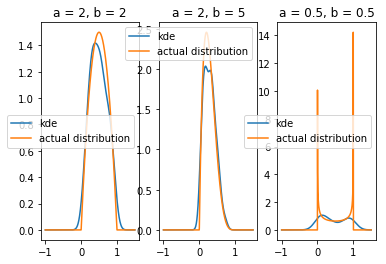

In [32]:
N = 100
x_grid = np.linspace(-1, 1.5, 1000)

    
A = beta(2,2)
X = A.rvs(N)
k = KDE(X)
plt.subplot(1,3,1)
plt.plot(x_grid, k.f(x_grid), label='kde')
plt.plot(x_grid, A.pdf(x_grid), label='actual distribution')
plt.title(f'a = {2}, b = {2}')
plt.legend()
 
A = beta(2,5)
X = A.rvs(N)
k = KDE(X)
plt.subplot(1,3,2)
plt.plot(x_grid, k.f(x_grid), label='kde')
plt.plot(x_grid, A.pdf(x_grid), label='actual distribution')
plt.title(f'a = {2}, b = {5}')
plt.legend()


A = beta(.5,.5)
X = A.rvs(N)
k = KDE(X)
plt.subplot(1,3,3)
plt.plot(x_grid, k.f(x_grid), label='kde')
plt.plot(x_grid, A.pdf(x_grid), label='actual distribution')
plt.title(f'a = {.5}, b = {.5}')
plt.legend()


plt.show()


Exercise 2

In [65]:
from numpy import random as rand

In [37]:
ρ = 0.9
b = 0.0
σ = 0.1
μ = -3
s = 0.2

In [38]:
Ψ_t = norm(loc=μ, scale=s)  # actual Ψ_t
Ψ_t1 = norm(loc=(ρ * μ + b), scale=np.sqrt(ρ**2 * s**2 + σ**2))  # actual Ψ_{t+1}

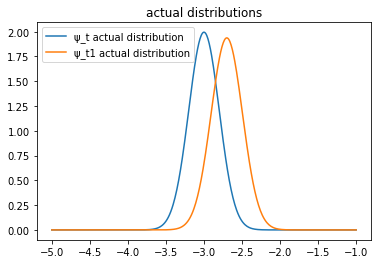

In [50]:
#plotting actual distributions
x_grid = np.linspace(μ - 2, μ + 2, 500)

plt.plot(x_grid, norm(loc=μ, scale=s).pdf(x_grid), label='ψ_t actual distribution')
plt.plot(x_grid, norm(loc=(ρ * μ + b), scale=np.sqrt(ρ**2 * s**2 + σ**2)).pdf(x_grid), label='ψ_t1 actual distribution')
plt.title('actual distributions')
plt.legend()
plt.show()


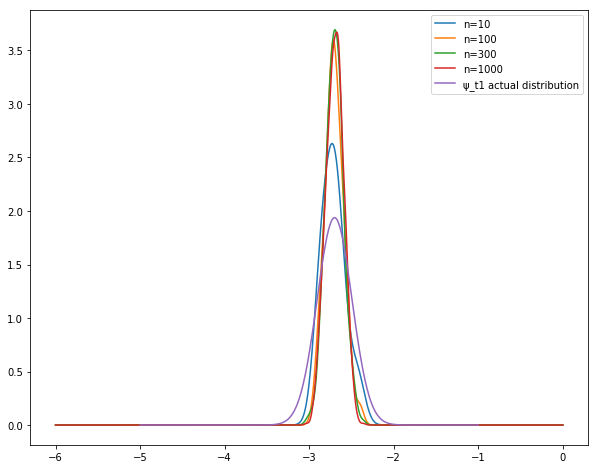

In [76]:
x = np.linspace(-6, 0, 1000)

def update(n):
    X_t = np.zeros(n)
    X_t = rand.normal(μ, s**2, n) #generate X_t
    c = np.zeros(n)
    c = rand.normal(0,1,n) #generate c
    X_t1 = np.zeros(n)
    X_t1 = ρ*X_t + b + σ*c
    est = KDE(X_t1)
    pdf = est.f(x)
    return pdf

update_10 = update(10)
update_100 = update(100)
update_300 = update(300)
update_1000 = update(1000)

plt.figure(figsize=(10, 8))
plt.plot(x, update_10, label = "n=10")
plt.plot(x, update_100, label ="n=100")
plt.plot(x, update_300, label ="n=300")
plt.plot(x, update_1000, label = "n=1000")
plt.plot(x_grid, norm(loc=(ρ * μ + b), scale=np.sqrt(ρ**2 * s**2 + σ**2)).pdf(x_grid), label='ψ_t1 actual distribution')



plt.legend()
plt.show()

Exercise 3

Suppose r(A) < 1. 

Gelfand's formula gives us: $||A^k||^\frac{1}{k} \rightarrow r(A)$. 

With the continuous mapping thoerem this is equivalent to: $||A^k|| \rightarrow (r(A))^k$.

Since $r(A) < 1, lim_{k \rightarrow \infty} (r(A))^k = 0$

So $lim_{k \rightarrow \infty} ||A^k|| =lim_{k \rightarrow \infty} (r(A))^k = 0$.

$\Rightarrow A^k \rightarrow 0$. 



# Homework 3

In [79]:
import quantecon as qe

In [84]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]


In [92]:
mc = qe.MarkovChain(P)
stat_dist = mc.stationary_distributions
flat_dist = stat_dist.flatten()


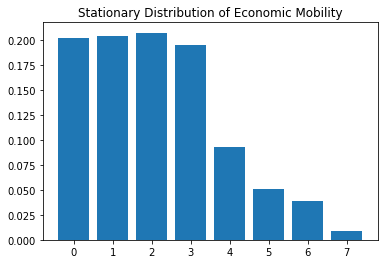

In [105]:
x = range(8)
plt.bar(x, flat_dist)
plt.title("Stationary Distribution of Economic Mobility")
plt.show()

Exercise 2

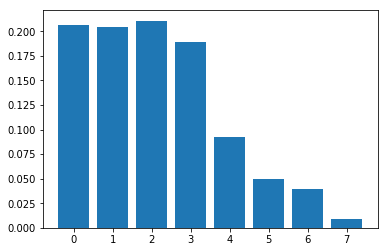

In [113]:
n = 10000
approx = mc.simulate(ts_length = n, init=1)

k0 = (approx == 0).sum()/n
k1 = (approx == 1).sum()/n
k2 = (approx == 2).sum()/n
k3 = (approx == 3).sum()/n
k4 = (approx == 4).sum()/n
k5 = (approx == 5).sum()/n
k6 = (approx == 6).sum()/n
k7 = (approx == 7).sum()/n

x = range(8)

plt.bar(x, [k0,k1,k2,k3,k4,k5,k6,k7])

plt.show()

Exercise 3

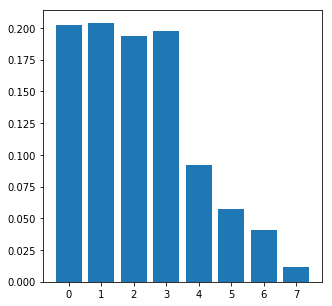

In [114]:
n = 1000
t = 1000
end_point = np.zeros(n)
for i in range(n):
    approx = mc.simulate(ts_length = t, init=1)
    end_point[i] = approx[t-1]

k0 = (end_point == 0).sum()/n
k1 = (end_point == 1).sum()/n
k2 = (end_point == 2).sum()/n
k3 = (end_point == 3).sum()/n
k4 = (end_point == 4).sum()/n
k5 = (end_point == 5).sum()/n
k6 = (end_point == 6).sum()/n
k7 = (end_point == 7).sum()/n

plt.figure(figsize=(5, 5))
plt.bar(x, [k0,k1,k2,k3,k4,k5,k6,k7])

plt.show()